In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
num_data = 1000
num_epoch = 10000
noise = init.normal_(torch.FloatTensor(num_data,1),std=1) # noise 정규분포로
x=init.uniform_(torch.Tensor(num_data,1),-15,15) # x를 -15~15 사이에 균등분포로
y= x**2 +3
y_noise = y+noise

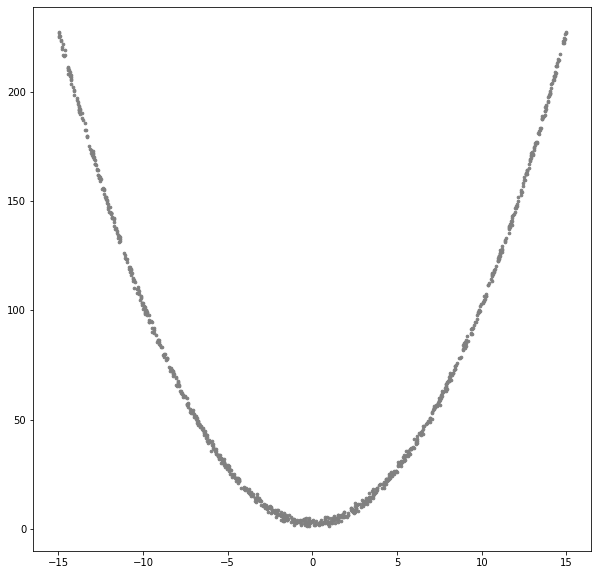

In [5]:
plt.figure(figsize=(10,10))
plt.scatter(x.numpy(),y_noise.numpy(),s=7,c="gray")

plt.show()

In [22]:
model = nn.Sequential(nn.Linear(1,6),
                     nn.ReLU(),
                     nn.Linear(6,10),
                     nn.ReLU(),
                     nn.Linear(10,6),
                     nn.LeakyReLU(),
                     nn.Linear(6,1))
# 1 -> 6 -> 10 -> 6 -> 1

In [23]:
loss_func = nn.L1Loss() # MAE
optimizer = optim.SGD(model.parameters(),lr = 0.0002) # 경사하강법

In [24]:
loss_array =[]
for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(x)
    loss = loss_func(output,y_noise)
    loss.backward()
    optimizer.step()
    
    loss_array.append(loss)

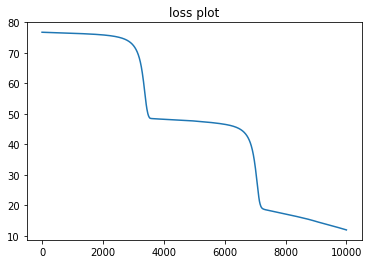

In [25]:
plt.plot(loss_array)
plt.title('loss plot')
plt.show()

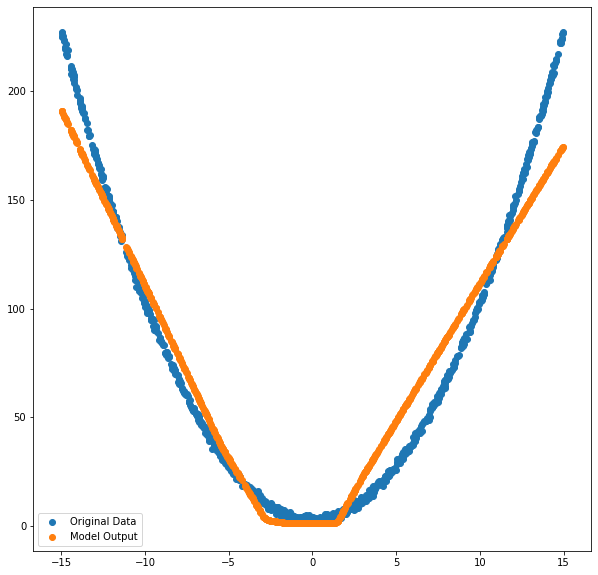

In [26]:
plt.figure(figsize=(10,10))
plt.scatter(x.detach().numpy(),y_noise,label="Original Data")
plt.scatter(x.detach().numpy(),output.detach().numpy(),label="Model Output")
plt.legend()
plt.show()